In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time

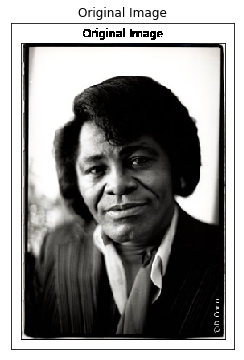

In [2]:
# Load in color image for face detection
image = cv2.imread('imgs/guy.png')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Number of faces detected: 1


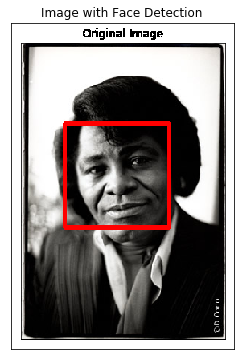

In [3]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

In [4]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#Detecting the faces in the cascade classifier

# For every face detected
for (x,y,w,h) in faces:
    
    #Draw a rectangle around it
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    
    # We create a roi for each face we detect, in both the color and grayscale images
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    
    #detect the eyes using the roi gray
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #for each eye detected
    for (ex,ey,ew,eh) in eyes:
        #draw a rectangle around the roi color
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


# Show the image
cv2.imshow('img',image)
cv2.waitKey(0)
cv2.destroyAllWindows()